<a href="https://colab.research.google.com/github/smritiirani/iot-powered/blob/main/iot_powered_vehicle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Vehicle is running normally. No maintenance needed.



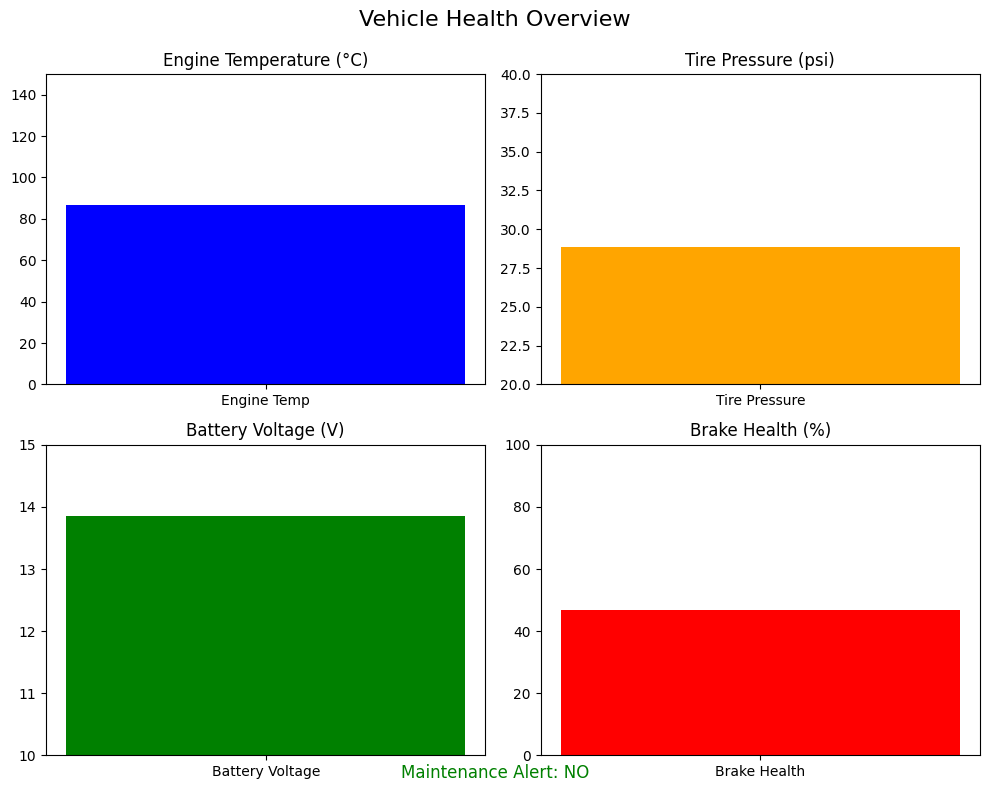

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Vehicle is running normally. No maintenance needed.



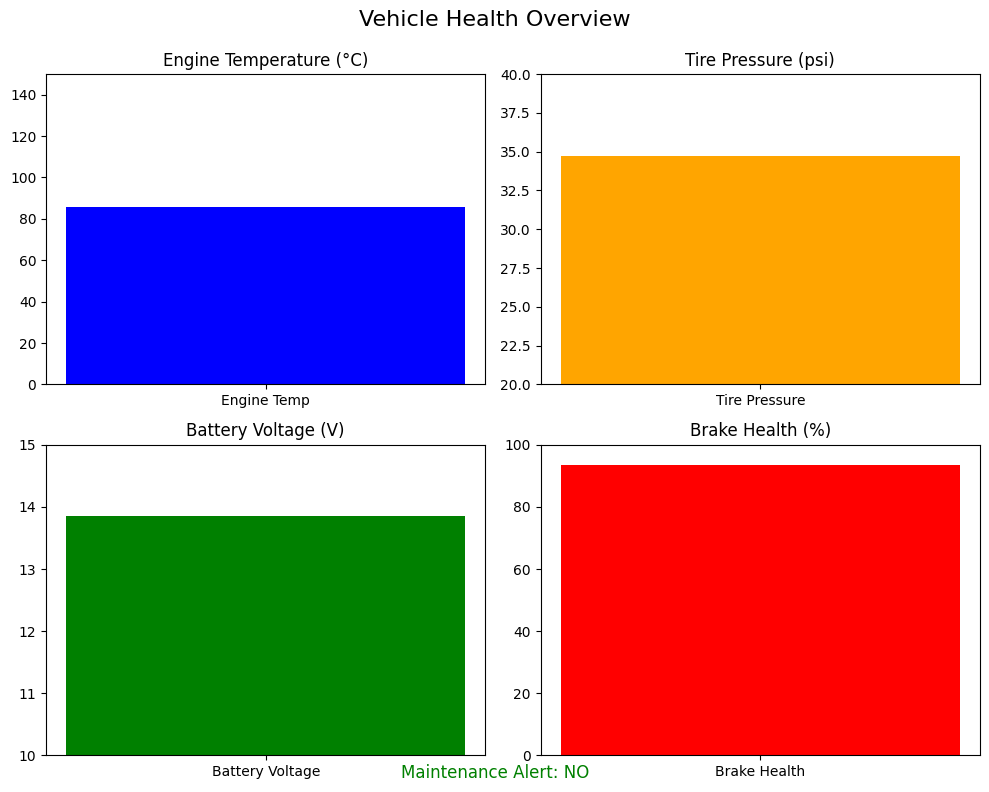

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 79.16332231887485°C, Tire Pressure: 32.497296857775105 psi, Battery Voltage: 12.70012604043314V, Brake Health: 6.838901001176967%
  Please schedule maintenance immediately.



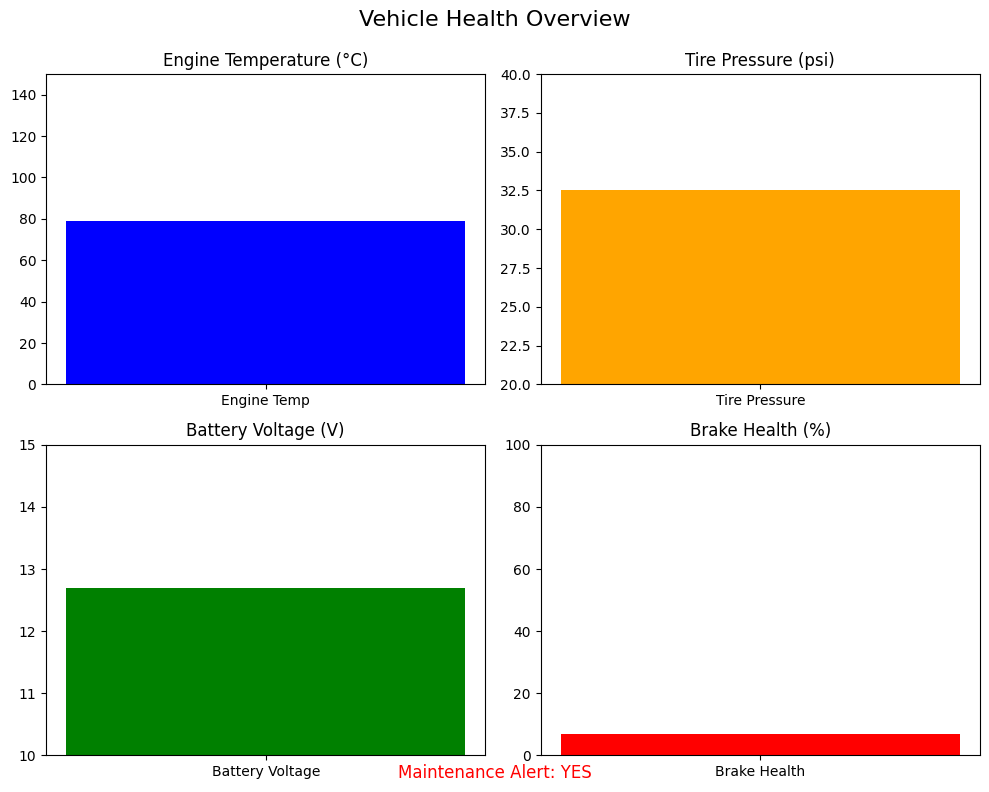

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Vehicle is running normally. No maintenance needed.



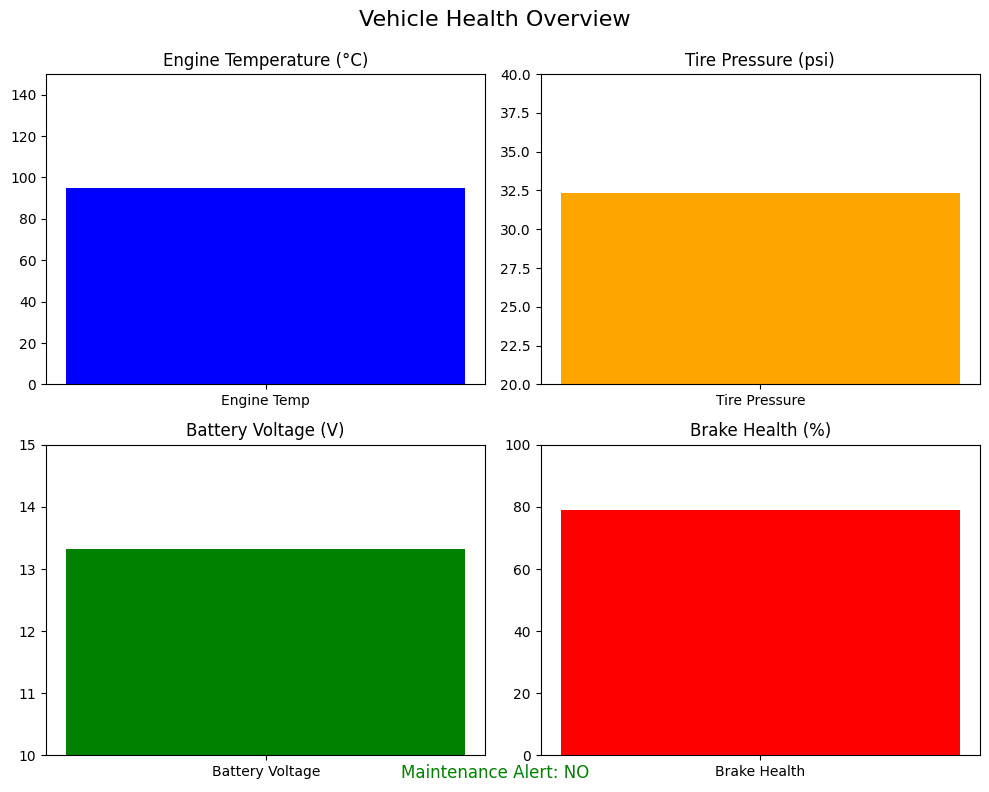

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 117.67893286481761°C, Tire Pressure: 27.959222564487778 psi, Battery Voltage: 13.5272342777767V, Brake Health: 46.23098444605568%
  Please schedule maintenance immediately.



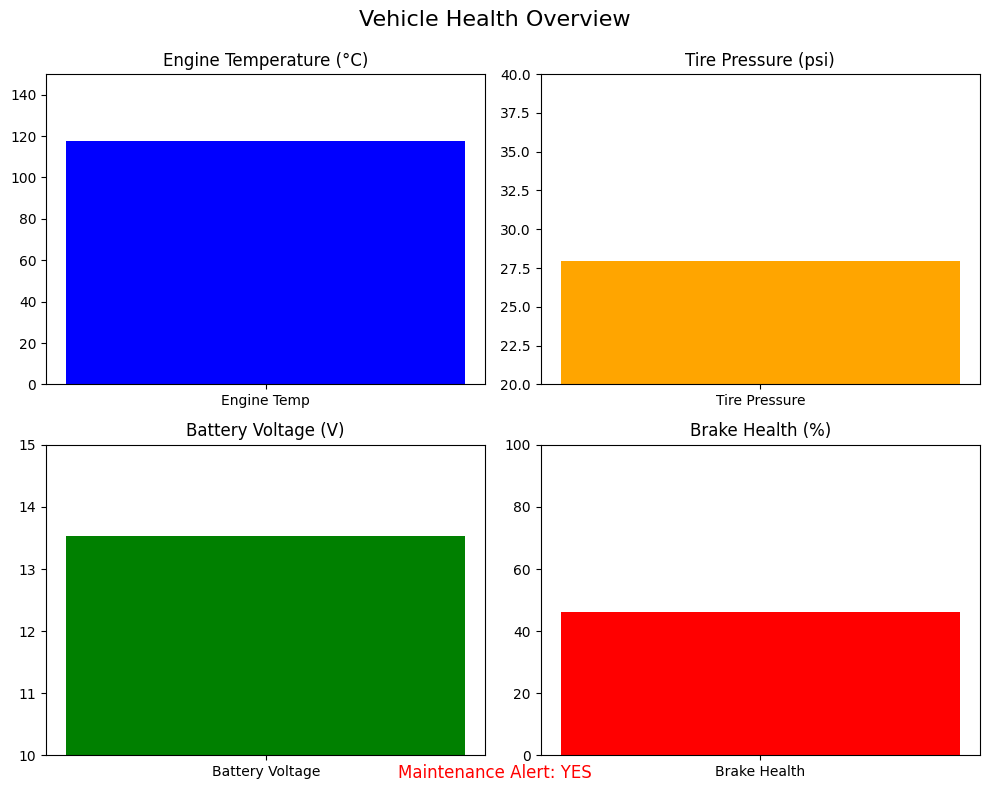

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 110.63938572320859°C, Tire Pressure: 33.42085169657807 psi, Battery Voltage: 13.383500715280665V, Brake Health: 24.135990726867927%
  Please schedule maintenance immediately.



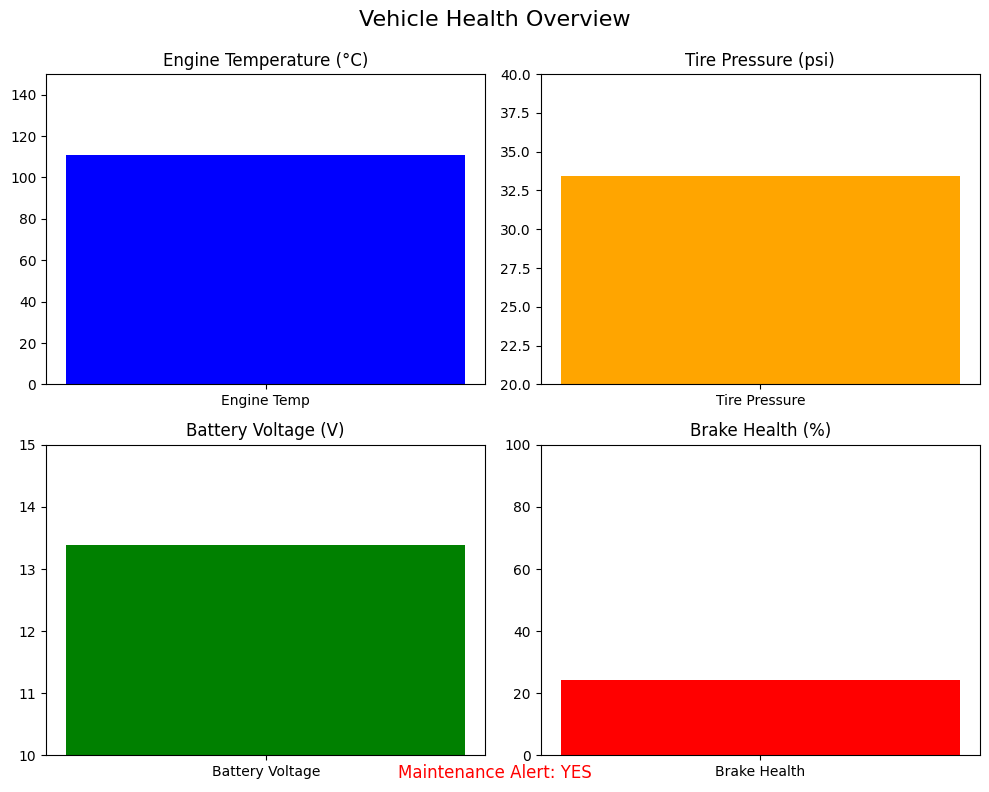

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Vehicle is running normally. No maintenance needed.



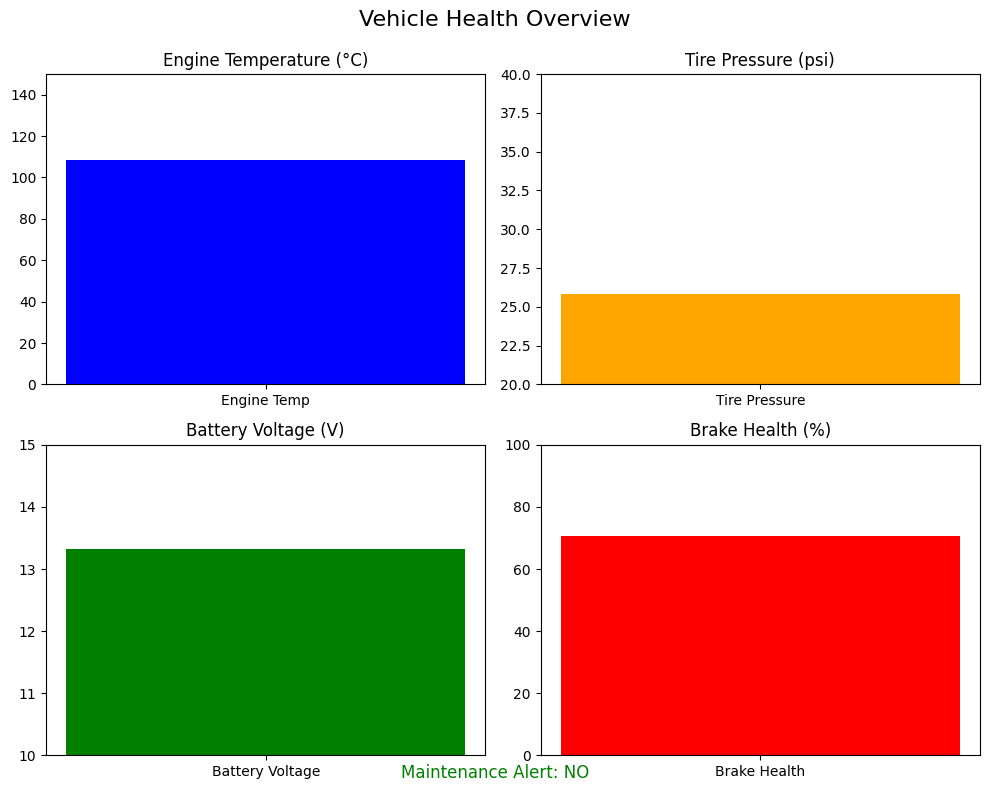

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 91.02519114352148°C, Tire Pressure: 26.891451709196605 psi, Battery Voltage: 11.268112788747528V, Brake Health: 31.394315086754908%
  Please schedule maintenance immediately.



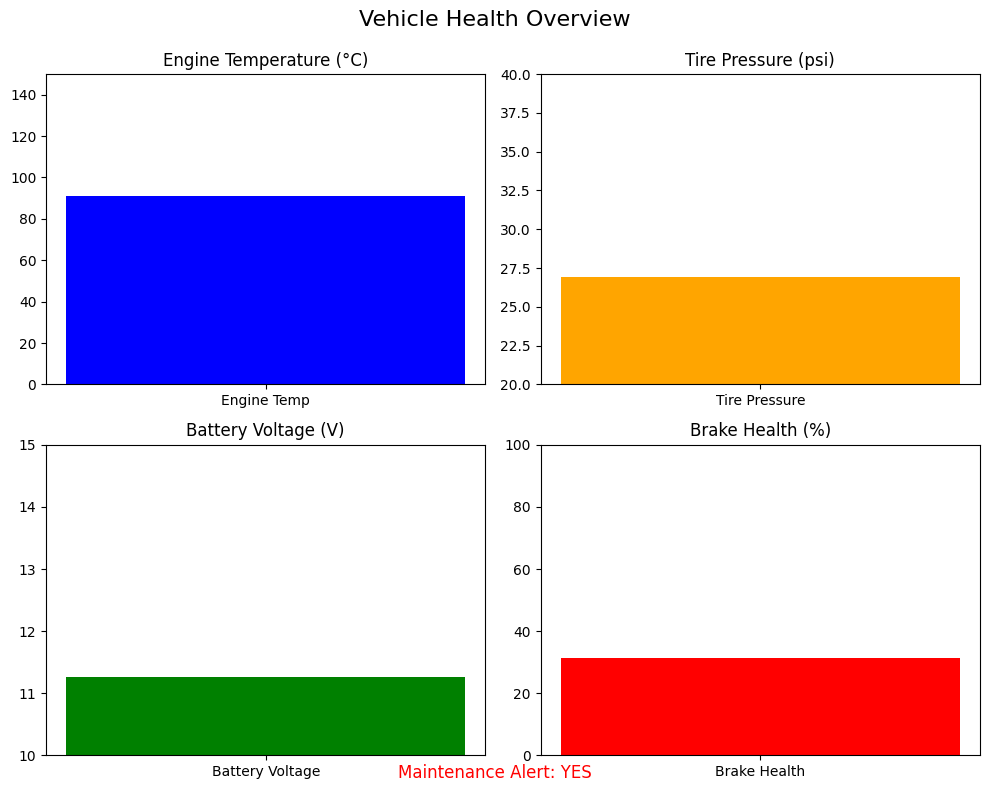

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 109.51815540186745°C, Tire Pressure: 29.15795700795402 psi, Battery Voltage: 11.636333695193189V, Brake Health: 58.382382247771545%
  Please schedule maintenance immediately.



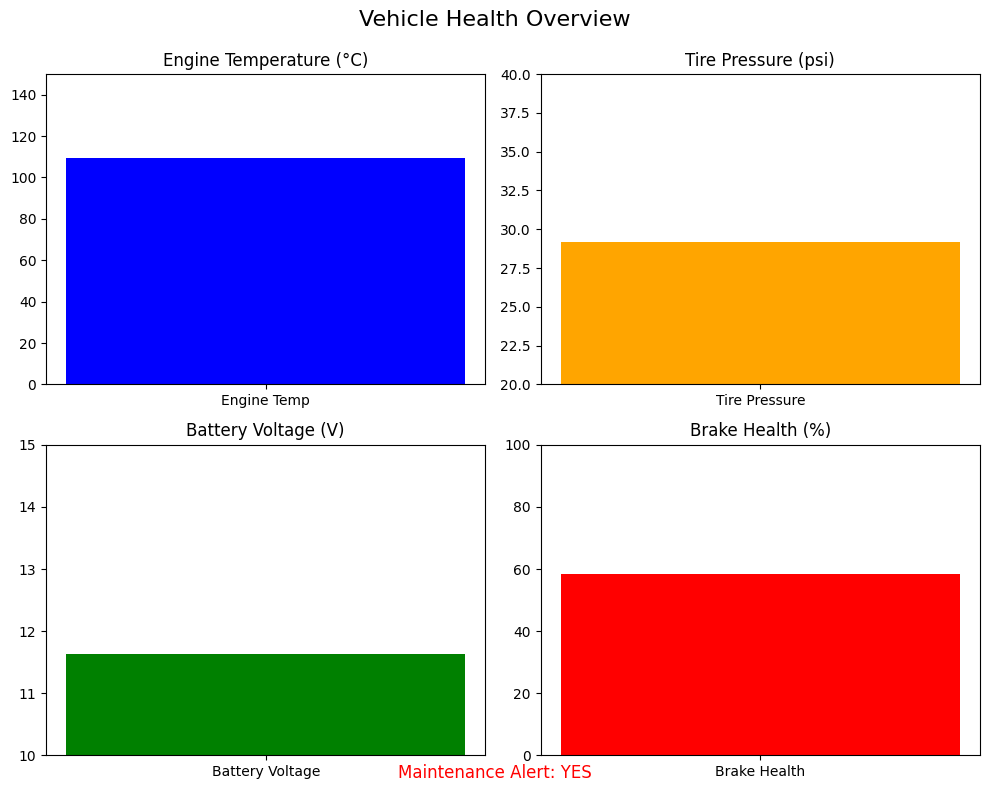

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ALERT: Potential failure detected with the following sensor data:
  Engine Temp: 88.32819049803227°C, Tire Pressure: 29.795569009589958 psi, Battery Voltage: 12.055717029509372V, Brake Health: 27.329744108380392%
  Please schedule maintenance immediately.



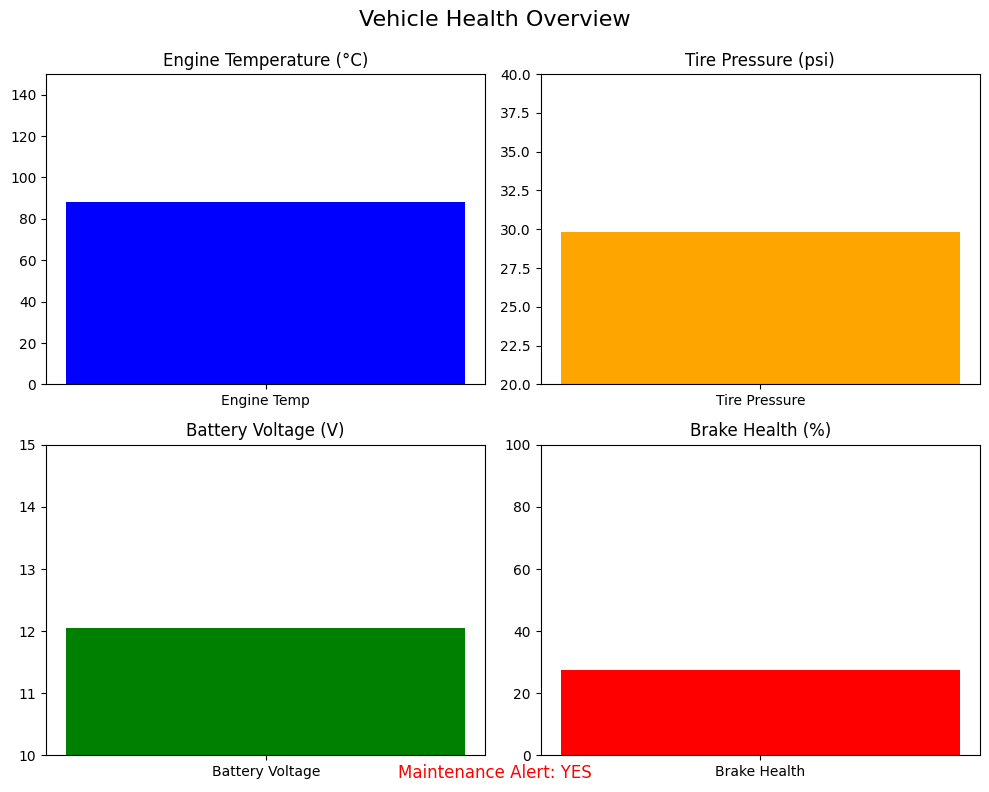

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Vehicle is running normally. No maintenance needed.



In [ ]:
import random
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Simulate the vehicle sensor data collection
def get_sensor_data():
    # Simulate the sensor values (in real scenario, these would be collected from physical sensors)
    engine_temp = random.uniform(70, 120)  # Engine temperature in Celsius
    tire_pressure = random.uniform(25, 35)  # Tire pressure in psi
    battery_voltage = random.uniform(11, 14)  # Battery voltage in volts
    brake_health = random.uniform(0, 100)  # Brake health as a percentage

    return engine_temp, tire_pressure, battery_voltage, brake_health

# Data to simulate the failure history (e.g., historical failure data for training the model)
def generate_historical_data():
    data = {
        'engine_temp': [90, 95, 110, 80, 120, 85, 70, 100, 115],
        'tire_pressure': [30, 32, 28, 31, 35, 29, 30, 30, 32],
        'battery_voltage': [12.5, 12.3, 11.8, 12.6, 13.0, 12.1, 12.8, 12.2, 12.4],
        'brake_health': [80, 75, 40, 85, 35, 70, 90, 80, 60],
        'failure': [0, 0, 1, 0, 1, 0, 0, 0, 1]  # 1 indicates failure, 0 indicates no failure
    }

    return pd.DataFrame(data)

# Train the predictive model based on historical data
def train_predictive_model():
    data = generate_historical_data()

    # Features (sensor data)
    X = data[['engine_temp', 'tire_pressure', 'battery_voltage', 'brake_health']]

    # Target variable (failure or no failure)
    y = data['failure']

    # Using Logistic Regression for simplicity in this example
    model = LogisticRegression()
    model.fit(X, y)

    return model

# Function to predict potential failure based on current sensor data
def predict_failure(model, current_data):
    # Predict the probability of failure
    failure_prob = model.predict_proba([current_data])[0][1]

    # If failure probability is greater than 70%, trigger alert
    if failure_prob > 0.7:
        return True
    else:
        return False

# Function to send maintenance alert
def send_alert(sensor_data, failure_pred):
    if failure_pred:
        print(f"ALERT: Potential failure detected with the following sensor data:")
        print(f"  Engine Temp: {sensor_data[0]}°C, Tire Pressure: {sensor_data[1]} psi, Battery Voltage: {sensor_data[2]}V, Brake Health: {sensor_data[3]}%")
        print("  Please schedule maintenance immediately.\n")
    else:
        print(f"Vehicle is running normally. No maintenance needed.\n")

# Function to plot the sensor data and prediction status
def plot_sensor_data(sensor_data, failure_pred):
    # Unpack the sensor data
    engine_temp, tire_pressure, battery_voltage, brake_health = sensor_data

    # Plotting the sensor data
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    ax[0, 0].bar(['Engine Temp'], [engine_temp], color='blue')
    ax[0, 0].set_title('Engine Temperature (°C)')
    ax[0, 0].set_ylim(0, 150)

    ax[0, 1].bar(['Tire Pressure'], [tire_pressure], color='orange')
    ax[0, 1].set_title('Tire Pressure (psi)')
    ax[0, 1].set_ylim(20, 40)

    ax[1, 0].bar(['Battery Voltage'], [battery_voltage], color='green')
    ax[1, 0].set_title('Battery Voltage (V)')
    ax[1, 0].set_ylim(10, 15)

    ax[1, 1].bar(['Brake Health'], [brake_health], color='red')
    ax[1, 1].set_title('Brake Health (%)')
    ax[1, 1].set_ylim(0, 100)

    # Set a title for the overall graph
    fig.suptitle('Vehicle Health Overview', fontsize=16)

    # Show alert status based on failure prediction
    alert_status = "Maintenance Alert: YES" if failure_pred else "Maintenance Alert: NO"
    plt.figtext(0.5, 0.02, alert_status, ha="center", fontsize=12, color="red" if failure_pred else "green")

    # Show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to fit title
    plt.show()

# Main function to simulate vehicle data collection, prediction, and alerting
def main():
    # Train the predictive model
    model = train_predictive_model()

    # Store sensor data for plotting (for this example, we'll store the last 10 data points)
    sensor_data_history = []

    # Simulate collecting sensor data every 5 seconds
    while True:
        # Collect new sensor data
        sensor_data = get_sensor_data()

        # Predict failure using the trained model
        failure_pred = predict_failure(model, sensor_data)

        # Send an alert if failure is predicted
        send_alert(sensor_data, failure_pred)

        # Add the sensor data to the history
        sensor_data_history.append(sensor_data)

        # Limit the history to the last 10 entries
        if len(sensor_data_history) > 10:
            sensor_data_history.pop(0)

        # Plot the sensor data and alert status
        plot_sensor_data(sensor_data, failure_pred)

        # Wait for 5 seconds before collecting new data
        time.sleep(5)

if __name__ == "__main__":
    main()